In [30]:
from mnist import MNIST
import numpy as np
from scipy import linalg
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [31]:
mndata = MNIST('./data/')
x_train, y_train = map(np.array, mndata.load_training())
x_test, y_test = map(np.array, mndata.load_testing())
x_train = x_train/255.0
x_test = x_test/255.0
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [33]:
# clustered_dict = {0:[(np.array(784,),np.array(label)),...],1:(np.array(784,),np.array(label)),}
def init_center(k,x):
    init_c = random.choices(x_train,k=k)
    center_dict = dict(zip(list(range(0,k)),init_c))   
    return  center_dict
     

In [34]:
def form_cluster(labeled_data,center_dict):
    cluster_dict = dict()
    for i in labeled_data:
        x = i[0]
        min_distance = 1000
        label = 100
        for j in center_dict.keys():
            c = center_dict[j]
            distance = np.linalg.norm(x - c)
            if (distance < min_distance):
                min_distance = distance
                label = j
        if label in  cluster_dict.keys():
            cluster_dict[label].append(i)
        else:
            cluster_dict[label] = [i]
    return cluster_dict

In [35]:
#cluster_list [(np.array(784,),np.array(label)),(,),(,)]
def sumCluster(cluster_list):
    sumc = cluster_list[0][0].copy()
    for i in range(1,len(cluster_list)):
        sumc = sumc + cluster_list[i][0]
    return sumc
    

In [36]:
def mean(cluster_list):
    return  sumCluster(cluster_list)/len(cluster_list)

In [37]:
# center_dict{1:np.array(mean_x)}
def new_center(cluster_dict):
    center_dict = dict()
    for i in cluster_dict.keys():
        center_dict[i] = mean(cluster_dict[i])
    return(center_dict)

In [38]:
def distance_change(center_old_dict,center_dict):
    distance_total = 0
    for i in center_old_dict.keys():
        distance = np.linalg.norm(center_old_dict[i] - center_dict[i])
        distance_total = distance_total + distance
    return distance_total

In [39]:
def cal_objective(converged_cluster_dict,center_dict):
    err = 0
    total = 0
    for i in center_dict.keys():
        #total = total + len(converged_cluster_dict[i])
        c = center_dict[i]
        for j in converged_cluster_dict[i]:
            x = j[0]
            err = err + np.linalg.norm(x - c)
    #err = err/total
    return err

In [40]:
def cal_err(converged_cluster_dict,center_dict):
    err = 0
    total = 0
    for i in center_dict.keys():
        total = total + len(converged_cluster_dict[i])
        c = center_dict[i]
        for j in converged_cluster_dict[i]:
            x = j[0]
            err = err + np.linalg.norm(x - c)
    err = err/total
    return err

In [46]:
def training(labeled_data,k):
    center_dict = init_center(k,labeled_data)
    cluster_dict = form_cluster(labeled_data,center_dict)
    distance = 10
    iter = 0
    obj_list = []
    while distance != 0:
        print(iter)
        old_center = center_dict
        center_dict = new_center(cluster_dict)
        cluster_dict = form_cluster(labeled_data,center_dict)
        obj = cal_objective(cluster_dict,center_dict)
        distance = distance_change(old_center,center_dict)
        iter = iter+1
        print(obj)
        obj_list.append(obj)
    return(center_dict,cluster_dict,obj_list,iter,k)   

def a4b(err_list,iter):
    plt.clf()
    plt.plot(range(1,iter+1),err_list,'-')
    plt.xlabel('Iteration')
    plt.ylabel('Objective function')
    plt.savefig('./a4b.png',bbox_inches='tight')
    

In [42]:
def plot_mnist(center_dict,k):
    fig = plt.figure()
    for i in range(0,k):
        cur_ax = fig.add_subplot(2, 5, i+1)
        sns.heatmap(center_dict[i].reshape((28,28)), cbar=False, ax=cur_ax)
        cur_ax.get_xaxis().set_visible(False)
        cur_ax.get_yaxis().set_visible(False)
        plt.savefig("./a4b2.png")


In [50]:
def a5b(labeled_data_train,labeled_data_test,k_list):
    test_err_list = []
    train_err_list = []
    for k in k_list:
        center_dict,cluster_dict,err_list,iter,k = training(labeled_data_train,k)
        test_cluster_dict = form_cluster(labeled_data_test,center_dict)
        test_err = cal_err(test_cluster_dict,center_dict)
        train_err = cal_err(cluster_dict,center_dict)
        train_err_list.append(train_err)
        test_err_list.append(test_err)
    plt.clf()
    sns.set()
    plt.plot(k_list,train_err_list,'-',label = 'training error')
    plt.plot(k_list,test_err_list,'-',label = 'test error')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.savefig('./a5b.png',bbox_inches='tight')
        

In [47]:
# labeled_data is a list [(np.array(784,),np.array(label)),(),()]
labeled_data_train = []
labeled_data_test = []
for i in range(0,x_train.shape[0]):
    labeled_data_train.append((x_train[i],y_train[i]))
for i in range(0,x_test.shape[0]):
    labeled_data_test.append((x_test[i],y_test[i]))

0
391100.9195418271
1
384614.30122237
2
381075.79176909616
3
378121.701941995
4
375905.8298924885
5
374328.5643740551
6
373206.06141848495
7
372462.2392289094
8
371945.19797376316
9
371590.5863558613
10
371307.7218836291
11
371031.7620055677
12
370740.8856404226
13
370421.31856376625
14
370133.8463469823
15
369939.4906315933
16
369823.7854939501
17
369761.673834148
18
369723.4525064542
19
369700.05779062794
20
369686.62146435893
21
369678.01395583054
22
369673.3746218713
23
369669.72108522075
24
369665.871058843
25
369665.8689388488
26
369667.1362850331
27
369667.1653423839
28
369666.4069696437
29
369666.7461129575
30
369667.0773823694
31
369667.57486181357
32
369667.61576134997
33
369667.64602836646
34
369667.62914678856
35
369667.62914678856


UnboundLocalError: local variable 'k' referenced before assignment

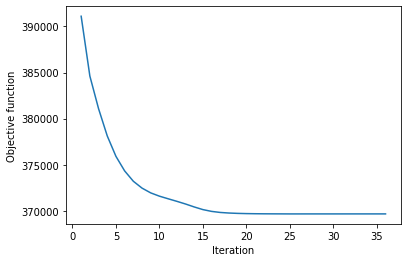

In [49]:
center_dict,cluster_dict,obj_list,iter,k = training(labeled_data_train,10)
a4b(obj_list,iter)


0
421290.86636183166
1
419658.72355272115
2
419182.14198065083
3
418855.5380147329
4
418576.46610991133
5
418329.7555488805
6
418122.38687657187
7
417947.5058426499
8
417809.47356929973
9
417703.1591877165
10
417626.982840367
11
417574.5468715227
12
417539.48633522657
13
417514.91718772094
14
417498.90638839983
15
417487.49773966975
16
417480.2178450955
17
417474.95279150165
18
417471.4213645715
19
417468.3062862538
20
417466.16425089655
21
417464.99917640636
22
417464.25892846595
23
417463.44299019285
24
417463.03174541565
25
417462.6642723545
26
417462.55084640835
27
417462.40353970067
28
417462.38635534234
29
417462.285782388
30
417462.24339690944
31
417462.221621472
32
417462.221621472
0
409473.1779896901
1
401385.76634927787
2
399197.1084582252
3
398712.3065779914
4
398538.7121992772
5
398455.16939351166
6
398396.9541775492
7
398355.96933288476
8
398322.38376991125
9
398299.81548064225
10
398284.4030560438
11
398271.75433609553
12
398261.8580630405
13
398252.4048342844
14
398244.1

319667.5019696445
76
319666.3469063513
77
319664.98825071676
78
319663.2855574723
79
319661.4884827531
80
319660.08980815177
81
319659.2178730269
82
319658.4117689502
83
319656.8625221203
84
319655.6560347955
85
319654.669025116
86
319654.0053823035
87
319652.80485584965
88
319651.1882575461
89
319650.2133438497
90
319649.9722870491
91
319649.461084426
92
319649.0348224304
93
319648.70911121514
94
319648.5767147571
95
319648.72483899404
96
319648.5147548044
97
319648.0966763881
98
319647.48582738993
99
319647.077745901
100
319646.49427522015
101
319645.77373322594
102
319644.9007834085
103
319644.1610982706
104
319643.4594585747
105
319642.7288262236
106
319641.59825898503
107
319640.61229812907
108
319639.89555959
109
319639.2487176323
110
319638.80112746527
111
319638.2328327457
112
319637.4215757582
113
319637.12826541666
114
319636.7414851983
115
319636.34625775827
116
319635.8100275166
117
319635.2546795692
118
319635.2478440884
119
319635.1291611498
120
319635.00592323166
121
319

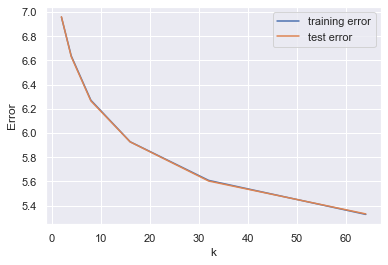

In [51]:
k_list = [2,4,8,16,32,64]
a5b(labeled_data_train,labeled_data_test,k_list)

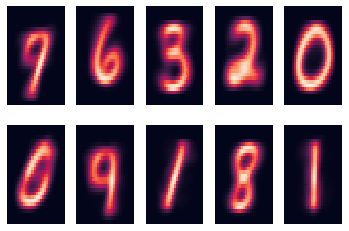

In [52]:
plot_mnist(center_dict,10)

In [125]:
#c
labeled_data_train = []
for i in range(0,x_train.shape[0]):
    labeled_data_train.append((x_train[i],y_train[i]))
labeled_data_test = []
for i in range(0,x_test.shape[0]):
    labeled_data_test.append((x_test[i],y_test[i]))
dict_k = dict()
for k in [2,4,8,16,32,64]:
    center_dict_train = init_center(k,labeled_data_train)
    cluster_dict_train = form_cluster(labeled_data_train,center_dict_train)
    distance = 10
    while distance >10e-1:
        old_center_train = center_dict_train
        center_dict_train = new_center(cluster_dict_train)
        cluster_dict_train = form_cluster(labeled_data_train,center_dict_train)
        distance = distance_change(old_center_train,center_dict_train)
    cluster_dict_test = form_cluster(labeled_data_test,center_dict_train)
    train_error = cal_err(cluster_dict_train,center_dict_train)
    test_error = cal_err(cluster_dict_test,center_dict_train)
    print(k,train_error, test_error)
    dict_k[k] = (train_error, test_error)

2 6.995486062491361 7.004833672855223
4 6.723491543363028 6.711145424544769
8 6.298066609029126 6.289156179225653
16 5.942967322533878 5.931090662773595
32 5.609448819494919 5.596340846568737
64 5.328177322691601 5.322757373869385
